In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

In [3]:
from sklearn import preprocessing

In [4]:
#https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea

In [70]:
train=pd.read_csv('train.csv')

In [132]:
train.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   36          4    1           0           0       0                0   
2   46          1    0           1          10       0                0   
3   50          1    1           1          20       0                0   
4   64          1    0           1          30       0                0   
5   61          3    0           0           0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
1             1         0      212  168.0   98.0  29.765625         72   
2             0         0      250  116.0   71.0  20.343750         88   
3             1         0      233  158.0   88.0  28.265625         68   
4             0         0      241  136.5   85.0  26.421875         70   
5             1         0      272  182.0  121.0  32.812500         85   

   glucose  TenYearCHD  
1       75           0  
2       94           0  
3       94           1  
4       77           0  
5       65           1

In [225]:
train.shape

(3390, 17)

In [92]:
(train['diaBP']%1).describe()

count    3390.000000
mean        0.082743
std         0.185837
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.500000
Name: diaBP, dtype: float64

In [71]:
train['cigsPerDay'] = train['cigsPerDay'].fillna(0)
train=train.dropna()

In [142]:
train.dtypes

id                   int64
age                  int16
education            int16
sex                 object
is_smoking          object
cigsPerDay           int16
BPMeds               int16
prevalentStroke      int16
prevalentHyp         int16
diabetes             int64
totChol              int16
sysBP              float16
diaBP              float16
BMI                float16
heartRate            int16
glucose              int16
TenYearCHD           int16
dtype: object

In [7]:
intCols = ['education','cigsPerDay','BPMeds','heartRate','totChol','glucose','prevalentStroke','prevalentHyp','age','TenYearCHD']
floatCols= ['sysBP','diaBP','BMI']

In [8]:
def toIntCols(df):
    for col in intCols:
        df[col] = df[col].astype(np.int16)
def toFloatCols(df):
    for col in floatCols:
        df[col] = df[col].astype(np.float16)

In [9]:
toIntCols(train)
toFloatCols(train)

In [10]:
colsCateg = ['sex','is_smoking']

In [11]:
def Categ(df):
    df.drop("id",axis=1,inplace=True)#just let it be here
    df['cigsPerDay'] = df['cigsPerDay'].fillna(0)#and it
    for col in colsCateg:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[col].values.astype('str')))
        df[col] = lbl.transform(list(df[col].values.astype('str')))

In [12]:
Categ(train)

In [13]:
def missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    percent_missing = percent_missing.sort_values(ascending=False)
    print(percent_missing)
    print("Всего "+str(len(percent_missing))+" столбца")
missing(train)

TenYearCHD         0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
diabetes           0.0
prevalentHyp       0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
age                0.0
dtype: float64
Всего 16 столбца


In [35]:
pp.ProfileReport(train)

In [14]:
targetCol = train['TenYearCHD']
train = train.drop('TenYearCHD',axis=1)

In [15]:
from sklearn.metrics import precision_score,recall_score

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
x, x_test, target, target_test = train_test_split(train, targetCol, test_size=0.2, random_state=0)

In [27]:
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
logreg.fit(x, target)
acc_log = round(logreg.score(x, target) * 100, 2)
acc_log

85.48

In [28]:
acc_test_log = round(logreg.score(x_test, target_test) * 100, 2)
acc_test_log

86.59

In [29]:
target_pred=logreg.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)

In [30]:
models = pd.DataFrame({'Название':['Логистическая регрессия'],'Train': [acc_log],'Test': [acc_test_log],'Точность(T)':[round(p_t*100,2)],'Точность(F)':[round(p_f*100,2)],'Полнота(T)':[round(r_t*100,2)],'Полнота(F)':[round(r_f*100,2)]})
models

Название  Train   Test  Точность(T)  Точность(F)  \
0  Логистическая регрессия  85.48  86.59         90.0        86.53   

   Полнота(T)  Полнота(F)  
0       10.34        99.8

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC()
svc.fit(x, target)
acc_svc = round(svc.score(x, target) * 100, 2)
acc_svc

84.8

In [33]:
acc_test_svc = round(svc.score(x_test, target_test) * 100, 2)
acc_test_svc

85.23

In [34]:
target_pred=svc.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None,zero_division=0)
r_f,r_t = recall_score(target_test,target_pred,average=None,zero_division=0)
models.loc[models.shape[0]] = ['Метод опорных векторов', acc_svc, acc_test_svc,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [35]:
from sklearn.svm import LinearSVC

In [36]:
linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(x, target)
acc_linear_svc = round(linear_svc.score(x, target) * 100, 2)
acc_linear_svc

85.22

In [37]:
acc_test_linear_svc = round(linear_svc.score(x_test, target_test) * 100, 2)
acc_test_linear_svc

85.91

In [38]:
target_pred=linear_svc.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Линейный метод опорных векторов', acc_linear_svc, acc_test_linear_svc,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(x, target)
acc_knn = round(knn.score(x, target) * 100, 2)
print(acc_knn, knn.best_params_)

87.81 {'n_neighbors': 2}


In [41]:
acc_test_knn = round(knn.score(x_test, target_test) * 100, 2)
acc_test_knn

84.21

In [42]:
target_pred=knn.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Метод k-ближайших соседей', acc_knn, acc_test_knn,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gaussian = GaussianNB()
gaussian.fit(x, target)
acc_gaussian = round(gaussian.score(x, target) * 100, 2)
acc_gaussian

82.59

In [45]:
acc_test_gaussian = round(gaussian.score(x_test, target_test) * 100, 2)
acc_test_gaussian

82.68

In [46]:
target_pred=gaussian.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Naive Bayes', acc_gaussian, acc_test_gaussian,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [47]:
from sklearn.linear_model import Perceptron

In [48]:
perceptron = Perceptron()
perceptron.fit(x, target)
acc_perceptron = round(perceptron.score(x, target) * 100, 2)
acc_perceptron

84.8

In [49]:
acc_test_perceptron = round(perceptron.score(x_test, target_test) * 100, 2)
acc_test_perceptron

85.23

In [50]:
target_pred=perceptron.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None,zero_division=0)
r_f,r_t = recall_score(target_test,target_pred,average=None,zero_division = 0)
models.loc[models.shape[0]] = ['Перцентрон ', acc_perceptron, acc_test_perceptron,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, target)
acc_decision_tree = round(decision_tree.score(x, target) * 100, 2)
acc_decision_tree

100.0

In [53]:
acc_test_decision_tree = round(decision_tree.score(x_test, target_test) * 100, 2)
acc_test_decision_tree

76.74

In [54]:
target_pred=decision_tree.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Дерево решений', acc_decision_tree, acc_test_decision_tree,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
sgd = SGDClassifier()
sgd.fit(x, target)
acc_sgd = round(sgd.score(x, target) * 100, 2)
acc_sgd

84.8

In [57]:
acc_test_sgd = round(sgd.score(x_test, target_test) * 100, 2)
acc_test_sgd

85.4

In [58]:
target_pred=sgd.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Стохастический градиентный спуск', acc_sgd, acc_test_sgd,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(x, target)
random_forest.fit(x, target)
acc_random_forest = round(random_forest.score(x, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 100}


In [61]:
acc_test_random_forest = round(random_forest.score(x_test, target_test) * 100, 2)
acc_test_random_forest

85.4

In [62]:
target_pred=random_forest.predict(x_test)
p_f,p_t = precision_score(target_test,target_pred,average=None)
r_f,r_t = recall_score(target_test,target_pred,average=None)
models.loc[models.shape[0]] = ['Случайный лес', acc_random_forest, acc_test_random_forest,round(p_t*100,2),round(p_f*100,2),round(r_t*100,2),round(r_f*100,2)]

In [63]:
models.sort_values(by='Test', ascending=False)

Название   Train   Test  Точность(T)  Точность(F)  \
0           Логистическая регрессия   85.48  86.59        90.00        86.53   
2   Линейный метод опорных векторов   85.22  85.91       100.00        85.81   
7  Стохастический градиентный спуск   84.80  85.40       100.00        85.37   
8                     Случайный лес  100.00  85.40        55.56        85.86   
1            Метод опорных векторов   84.80  85.23         0.00        85.23   
5                       Перцентрон    84.80  85.23         0.00        85.23   
3         Метод k-ближайших соседей   87.81  84.21        25.00        85.44   
4                       Naive Bayes   82.59  82.68        32.56        86.63   
6                    Дерево решений  100.00  76.74        25.49        87.47   

   Полнота(T)  Полнота(F)  
0       10.34       99.80  
2        4.60      100.00  
7        1.15      100.00  
8        5.75       99.20  
1        0.00      100.00  
5        0.00      100.00  
3        3.45       98.21  
4       16.09       94.22  
6       29.89       84.86

In [64]:
import matplotlib.pyplot as plt

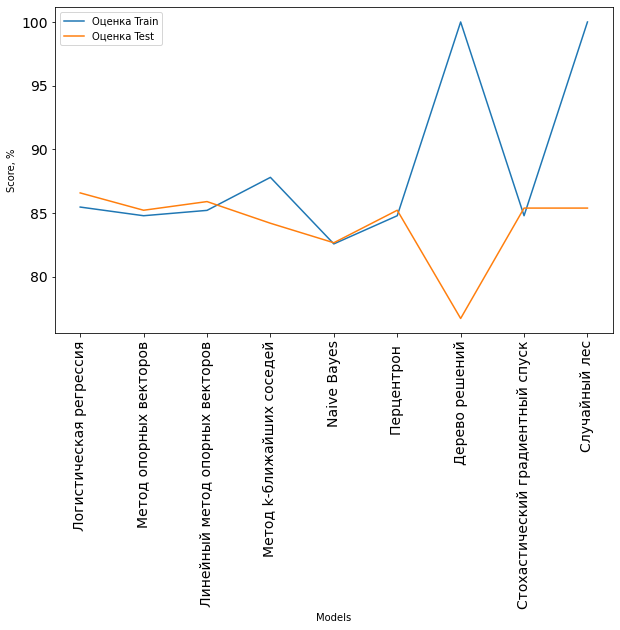

In [67]:
plt.figure(figsize=[10,6])
xx = models['Название']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Train'], label = 'Оценка Train')
plt.plot(xx, models['Test'], label = 'Оценка Test')
plt.legend()
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()